In [15]:
import plotly.express as px
import pandas as pd

In [3]:
df = pd.read_csv("./df_2020_2023.csv")

/var/folders/yx/gjm2fjs56vl5kkwrb6xf5d2h0000gn/T/ipykernel_94895/1352109313.py:1: DtypeWarning: Columns (46,180,181,183,184,188,189,190,191,194,195,196,197,198,199,204,205,206,207,214,215,216,217,218,219,220,221,223,225,227,234,235,236,237,238,239,244,245,246,249,250,254,255,256,261,263,264,267,268,269,270,278,284,285,303,333) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./df_2020_2023.csv")


In [4]:
df_rost = pd.read_csv("./df_rost_2020_2023.csv")

In [5]:
cols = [
    'desc',
    'season',
    'possession_team',
    'defteam',
    'offense_formation',
    'offense_personnel',
    'defenders_in_box',
    'defense_personnel',
    'number_of_pass_rushers',
    'players_on_play',
    'offense_players',
    'defense_players',
    'n_offense',
    'n_defense',
    'route',
    'defense_man_zone_type',
    'defense_coverage_type',
    'yards_gained',
    'no_huddle',
    'qb_dropback',
    'qb_kneel',
    'qb_spike',
    'qb_scramble',
    'pass_length',
    'pass_location',
    'ep',
    'epa',
    'td_prob',
    'qb_hit',
    'sack',
    'cp',
    'cpoe',
    'qb_epa',
    'xyac_epa',
    'xyac_mean_yardage',
    'xyac_median_yardage',
    'xyac_success',
    'time_to_throw',
    'was_pressure',
    'number_of_pass_rushers',
    'incomplete_pass',
    'passer_player_id',
    'passer_player_name',
    'passing_yards',
    'receiver_player_id',
    'receiver_player_name',
    'receiving_yards',
    'rusher_player_id',
    'rusher_player_name',
]

In [6]:
df_detailed = df.query("play_type == 'pass' and season_type=='REG' and penalty==0")[cols]
df_detailed.head(5)

,desc,season,possession_team,defteam,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,...,number_of_pass_rushers,incomplete_pass,passer_player_id,passer_player_name,passing_yards,receiver_player_id,receiver_player_name,receiving_yards,rusher_player_id,rusher_player_name
6,(12:39) (Shotgun) 10-J.Garoppolo pass short mi...,2020,SF,ARI,SHOTGUN,"1 RB, 1 TE, 3 WR",5.0,"1 DL, 5 LB, 5 DB",4.0,46078;38547;45069;46113;38551;41325;45185;4781...,...,4.0,0.0,00-0031345,J.Garoppolo,11.0,00-0033288,G.Kittle,11.0,NaN,NaN
9,(11:50) (Shotgun) 1-K.Murray pass short left t...,2020,ARI,SF,SHOTGUN,"1 RB, 1 TE, 3 WR",5.0,"4 DL, 2 LB, 5 DB",4.0,42389;47785;39973;38779;39965;44815;46166;4778...,...,4.0,0.0,00-0035228,K.Murray,3.0,00-0030564,D.Hopkins,3.0,NaN,NaN
10,"(11:24) (No Huddle, Shotgun) 1-K.Murray pass s...",2020,ARI,SF,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"4 DL, 3 LB, 4 DB",4.0,42389;47785;39973;38779;44815;39965;46166;4778...,...,4.0,0.0,00-0035228,K.Murray,7.0,00-0022921,L.Fitzgerald,7.0,NaN,NaN
12,(10:58) (Shotgun) 1-K.Murray pass incomplete s...,2020,ARI,SF,EMPTY,"1 RB, 1 TE, 3 WR",5.0,"4 DL, 2 LB, 5 DB",4.0,46203;42389;47785;39973;38779;39965;44815;4616...,...,4.0,1.0,00-0035228,K.Murray,NaN,00-0022921,L.Fitzgerald,NaN,NaN,NaN
13,"(10:55) (No Huddle, Shotgun) 1-K.Murray pass s...",2020,ARI,SF,EMPTY,"1 RB, 0 TE, 4 WR",4.0,"4 DL, 2 LB, 5 DB",4.0,41249;46203;42389;47785;39973;38779;39965;4481...,...,4.0,0.0,00-0035228,K.Murray,10.0,00-0022921,L.Fitzgerald,10.0,NaN,NaN


In [7]:
df_detailed.desc.iloc[0]

'(12:39) (Shotgun) 10-J.Garoppolo pass short middle to 85-G.Kittle to ARI 34 for 11 yards (58-J.Hicks). Caught at AZ 48, 14-YAC'

In [8]:
df_detailed.route.iloc[0]

'HITCH'

In [9]:
df_detailed.pass_location.iloc[0]

'middle'

In [10]:
result = df_detailed.groupby('offense_formation').agg({
    'yards_gained': ['sum', 'mean'],
    'was_pressure': ['sum', 'mean']
}).reset_index()

In [11]:
result.head()

offense_formation yards_gained           was_pressure          
                             sum      mean          sum      mean
0             EMPTY      60989.0  6.027772       2577.0  0.273132
1            I_FORM      16887.0  7.419596        622.0  0.296473
2             JUMBO        697.0  3.226852         54.0  0.267327
3            PISTOL      11865.0  6.328000        402.0  0.229190
4           SHOTGUN     294888.0  5.951082      13676.0  0.296762

In [12]:
result = df_detailed.groupby(['offense_formation', 'defense_man_zone_type', 'defense_coverage_type']).agg({
    'yards_gained': ['sum', 'mean'],
    'was_pressure': ['sum', 'mean']
}).reset_index()

In [13]:
result.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in result.columns]

In [14]:
result

,offense_formation_,defense_man_zone_type_,defense_coverage_type_,yards_gained_sum,yards_gained_mean,was_pressure_sum,was_pressure_mean
0,EMPTY,MAN_COVERAGE,2_MAN,1429.0,7.682796,71.0,0.381720
1,EMPTY,MAN_COVERAGE,COVER_0,2569.0,4.670909,239.0,0.434545
2,EMPTY,MAN_COVERAGE,COVER_1,15848.0,6.996909,632.0,0.279029
3,EMPTY,ZONE_COVERAGE,COVER_2,8903.0,7.309524,307.0,0.252053
4,EMPTY,ZONE_COVERAGE,COVER_3,19410.0,7.055616,750.0,0.272628
5,EMPTY,ZONE_COVERAGE,COVER_4,12091.0,6.815671,409.0,0.230552
6,EMPTY,ZONE_COVERAGE,COVER_6,4283.0,6.809221,154.0,0.244833
7,EMPTY,ZONE_COVERAGE,PREVENT,394.0,8.382979,12.0,0.255319
8,I_FORM,MAN_COVERAGE,2_MAN,91.0,8.272727,1.0,0.090909
9,I_FORM,MAN_COVERAGE,COVER_0,431.0,3.848214,35.0,0.312500


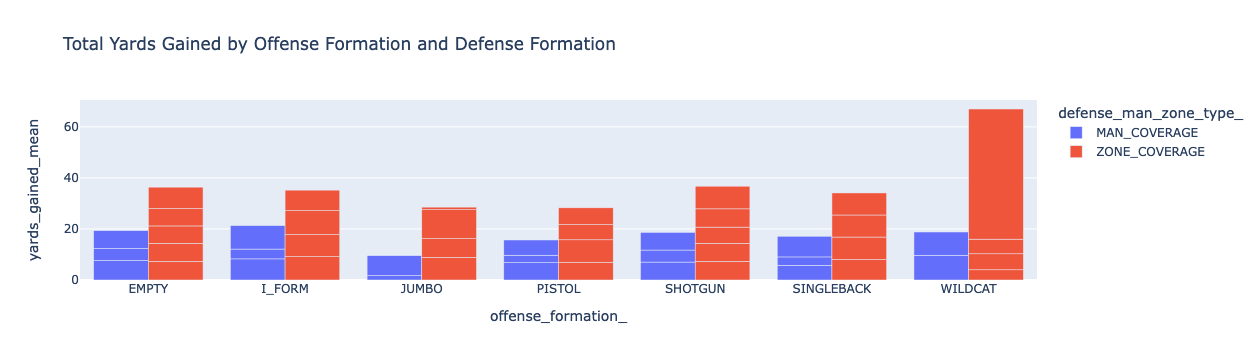

In [23]:
fig = px.bar(
    result,
    x='offense_formation_',   # X-axis: offense formation
    y='yards_gained_mean',  # Y-axis: total yards gained
    color='defense_man_zone_type_',  # Optionally color by defense formation
    hover_data=['defense_coverage_type_'],
    title="Total Yards Gained by Offense Formation and Defense Formation",
    barmode="group",
)

# Show the plot
fig.show()

In [47]:
result = df_detailed.groupby(['passer_player_id']).agg({
    'passer_player_name': lambda x: x.mode()[0],
    'yards_gained': ['mean'],
    'ep': ['mean'],
    'epa': ['mean'],
    'was_pressure': ['mean'],
    'time_to_throw': ['mean'],
    'qb_dropback': ['sum']
}).reset_index()

In [48]:
result.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in result.columns]

In [49]:
filtered_result = result[result['qb_dropback_sum'] >= 100]

In [50]:
filtered_result.sort_values(by='passer_player_name_<lambda>')

,passer_player_id_,passer_player_name_<lambda>,yards_gained_mean,ep_mean,epa_mean,was_pressure_mean,time_to_throw_mean,qb_dropback_sum
25,00-0027973,A.Dalton,5.852720,2.062760,-0.044548,0.254032,2.580349,1066.0
222,00-0038579,A.O'Connell,5.604396,2.058056,-0.062455,0.293893,2.743584,364.0
6,00-0023459,A.Rodgers,6.812161,2.191605,0.162599,0.207116,2.687844,1661.0
5,00-0023436,A.Smith,5.282051,1.890119,-0.130328,0.286853,2.634876,273.0
72,00-0032434,B.Allen,5.297872,1.636782,-0.129306,0.200000,2.463543,188.0
...,...,...,...,...,...,...,...,...
68,00-0032156,T.Siemian,4.939791,1.932116,-0.190830,0.290102,2.704683,382.0
169,00-0036212,T.Tagovailoa,6.891228,2.000655,0.103698,0.232958,2.500371,1710.0
27,00-0028118,T.Taylor,5.777215,1.721758,-0.086241,0.342657,2.797486,395.0
230,00-0039152,W.Levis,5.765125,1.544450,-0.053389,0.378049,2.847073,281.0


In [53]:
filtered_result['t2t_norm'] = filtered_result.time_to_throw_mean / filtered_result.time_to_throw_mean.max()

/var/folders/yx/gjm2fjs56vl5kkwrb6xf5d2h0000gn/T/ipykernel_94895/1782450419.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
filtered_result.sort_values(by='epa_mean', inplace=True)

/var/folders/yx/gjm2fjs56vl5kkwrb6xf5d2h0000gn/T/ipykernel_94895/857331142.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



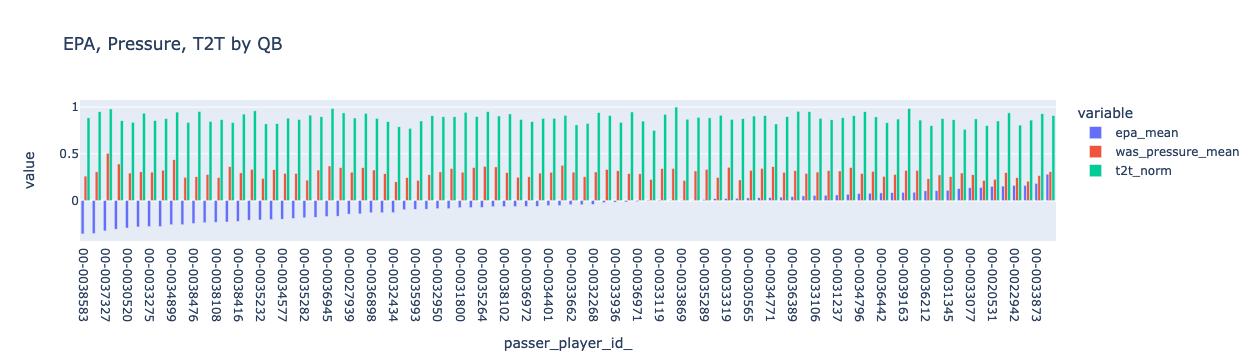

In [56]:
fig = px.bar(
    filtered_result,
    x='passer_player_id_',   # X-axis: offense formation
    y=['epa_mean', 'was_pressure_mean', 't2t_norm'],  # Y-axis: total yards gained
    hover_data=['passer_player_name_<lambda>'],
    title="EPA, Pressure, T2T by QB",
    barmode="group",
)

# Show the plot
fig.show()

/var/folders/yx/gjm2fjs56vl5kkwrb6xf5d2h0000gn/T/ipykernel_94895/2927918369.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



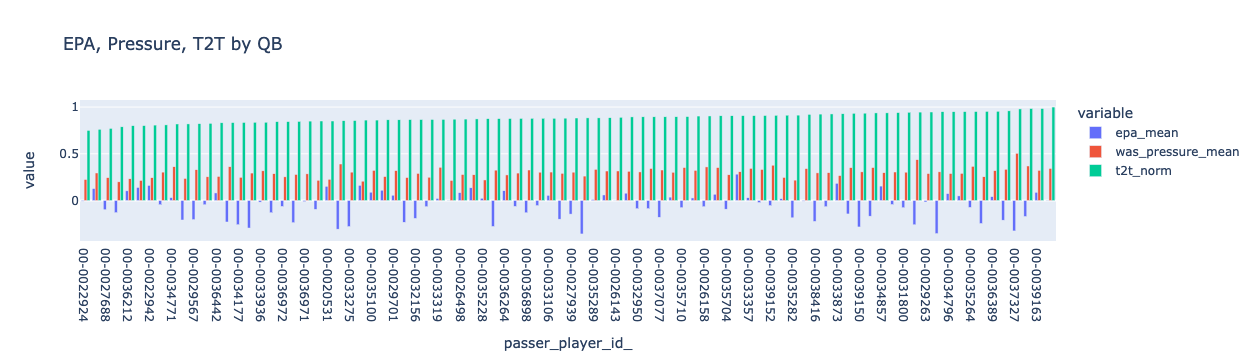

In [57]:
filtered_result.sort_values(by='t2t_norm', inplace=True)
fig = px.bar(
    filtered_result,
    x='passer_player_id_',   # X-axis: offense formation
    y=['epa_mean', 'was_pressure_mean', 't2t_norm'],  # Y-axis: total yards gained
    hover_data=['passer_player_name_<lambda>'],
    title="EPA, Pressure, T2T by QB",
    barmode="group",
)

# Show the plot
fig.show()

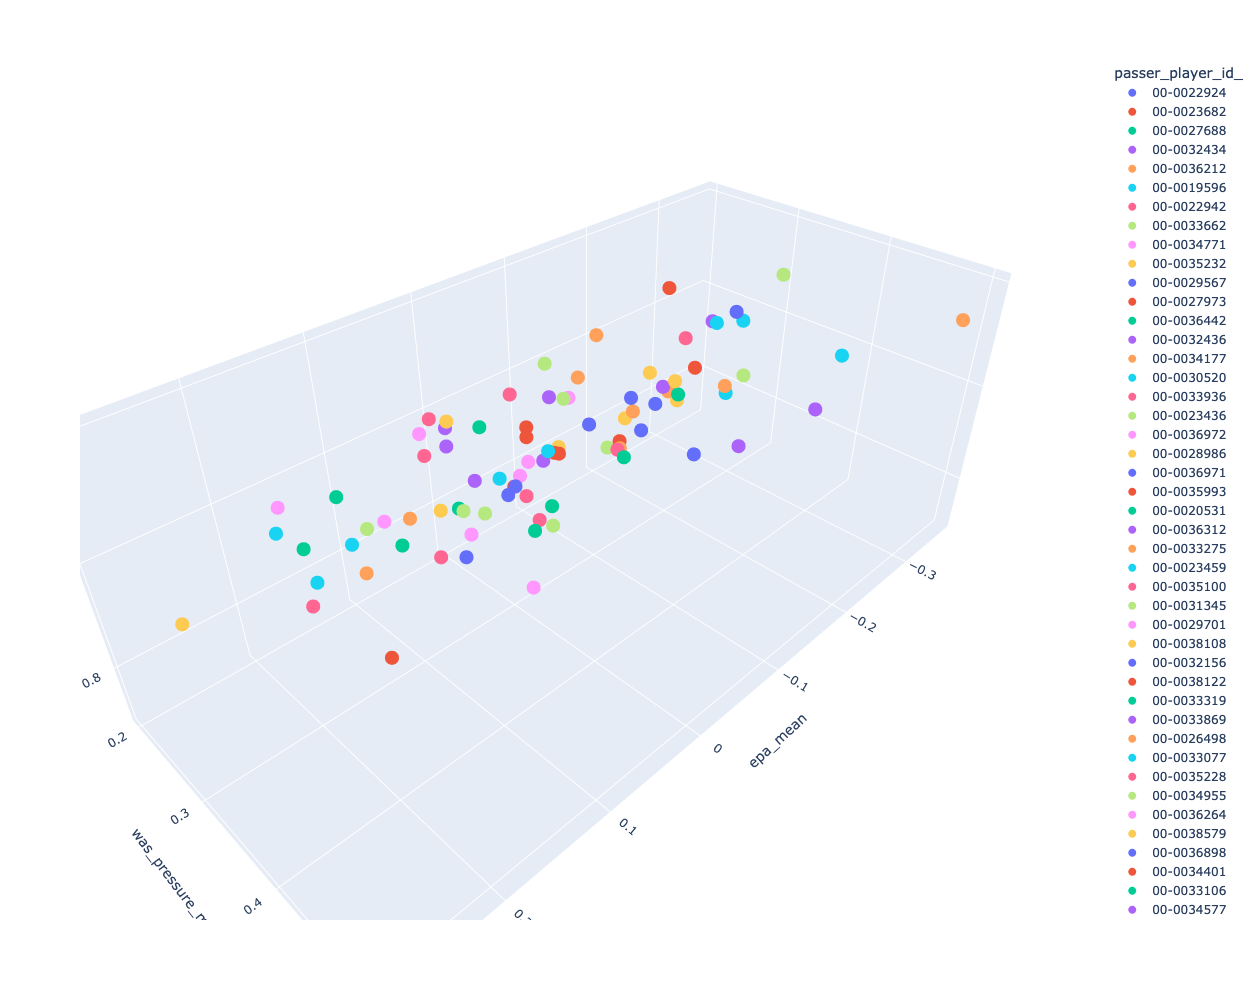

In [59]:
fig = px.scatter_3d(filtered_result, x='epa_mean', y='was_pressure_mean', z='t2t_norm',
              color='passer_player_id_', hover_data=['passer_player_name_<lambda>', 'qb_dropback_sum'], height=1000)
fig.show()

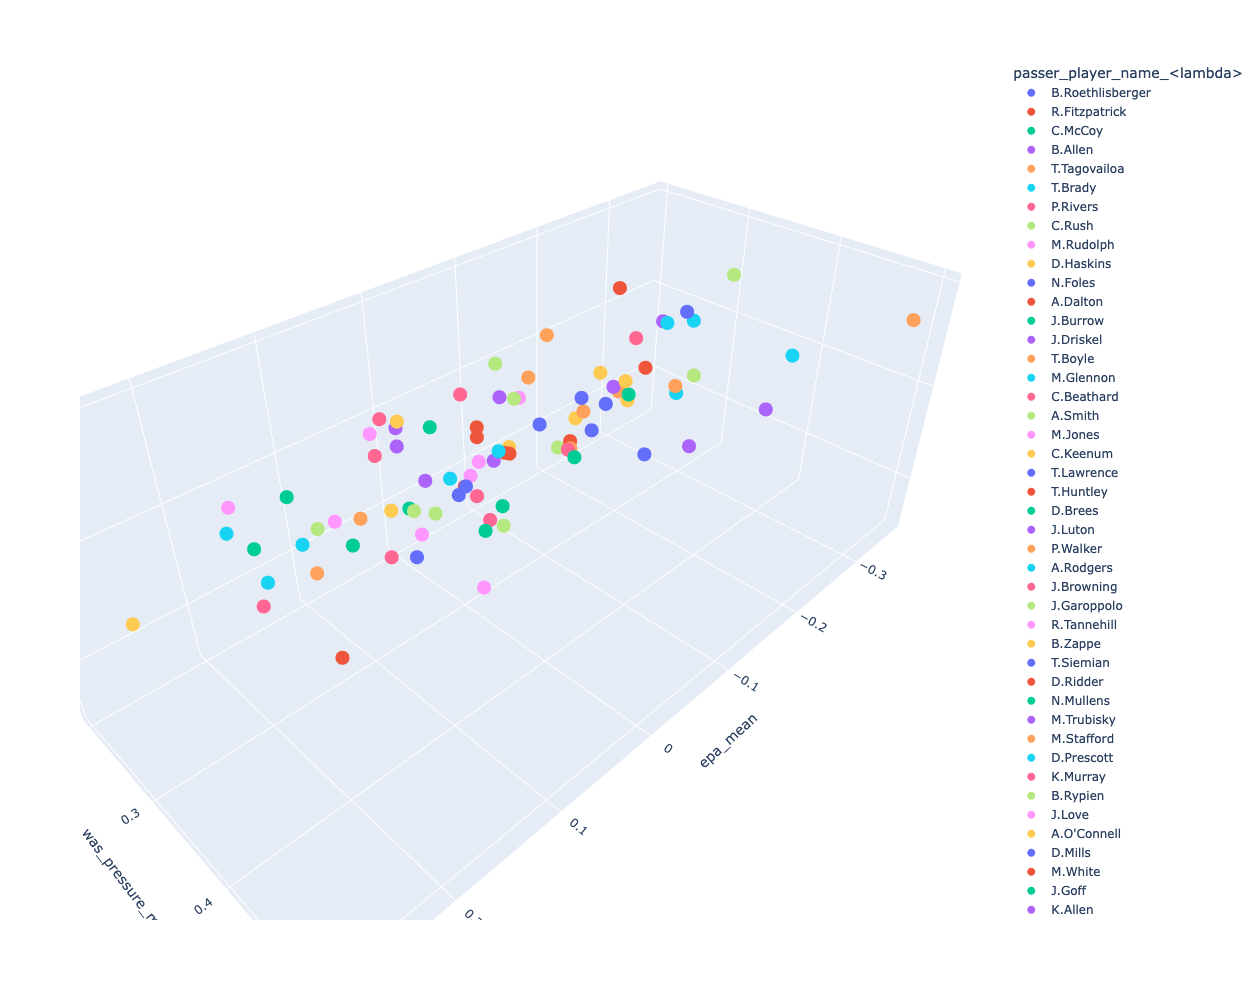

In [60]:
fig = px.scatter_3d(filtered_result, x='epa_mean', y='was_pressure_mean', z='t2t_norm',
              color='passer_player_name_<lambda>', hover_data=['passer_player_name_<lambda>', 'qb_dropback_sum'], height=1000)
fig.show()

In [61]:
result = df_detailed.groupby(['possession_team', 'season']).agg({
    'yards_gained': ['mean'],
    'ep': ['mean'],
    'epa': ['mean'],
    'was_pressure': ['mean'],
    'time_to_throw': ['mean'],
    'qb_dropback': ['sum']
}).reset_index()

In [63]:
result.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in result.columns]
result.head()

,possession_team_,season_,yards_gained_mean,ep_mean,epa_mean,was_pressure_mean,time_to_throw_mean,qb_dropback_sum
0,ARI,2020,6.577966,1.929766,0.011524,0.218247,2.713190,590.0
1,ARI,2021,6.812500,2.020169,0.148297,0.232775,2.716082,576.0
2,ARI,2022,5.136558,1.754482,-0.114995,0.210769,2.580554,703.0
3,ARI,2023,4.897384,1.754786,-0.233787,0.295154,2.799764,497.0
4,ATL,2020,6.558912,2.110855,0.096755,0.313916,2.872654,662.0


In [69]:
result.season_ = result.season_.astype(int)

In [73]:
result['t2t_norm'] = result.time_to_throw_mean / (result.time_to_throw_mean.max() * 2)

In [78]:
result.sort_values(by='t2t_norm', inplace=True)

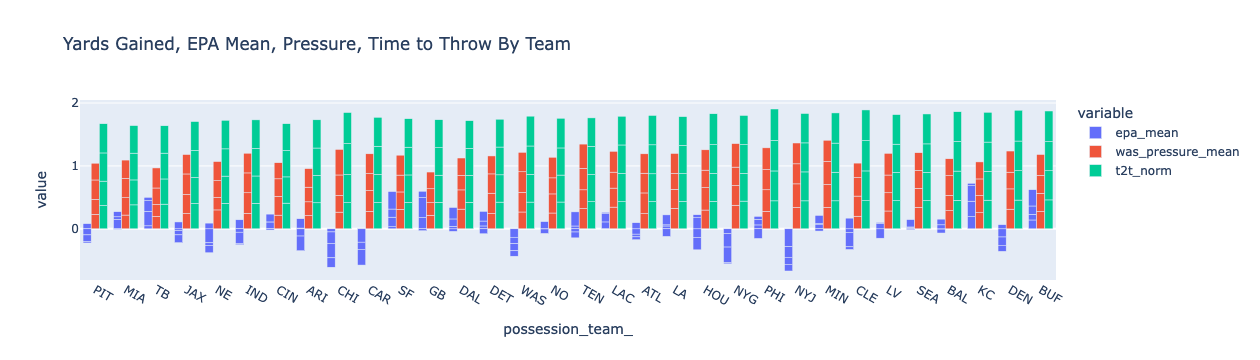

In [79]:
fig = px.bar(
    result,
    x='possession_team_',   # X-axis: offense formation
    y=['epa_mean', 'was_pressure_mean', 't2t_norm'],  # Y-axis: total yards gained
    # color='season_',
    title="Yards Gained, EPA Mean, Pressure, Time to Throw By Team",
    barmode="group",
)

# Show the plot
fig.show()

In [83]:
result = df_detailed.groupby(['possession_team', 'season']).agg({
    'passer_player_name': lambda x: x.mode()[0],
    'yards_gained': ['mean'],
    'ep': ['mean'],
    'epa': ['mean'],
    'was_pressure': ['mean'],
    'time_to_throw': ['mean'],
    'qb_dropback': ['sum'],
    'cpoe': ['mean'],
    'qb_epa': ['mean'],
}).reset_index()

In [84]:
result.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in result.columns]
result.head()

,possession_team_,season_,passer_player_name_<lambda>,yards_gained_mean,ep_mean,epa_mean,was_pressure_mean,time_to_throw_mean,qb_dropback_sum,cpoe_mean,qb_epa_mean
0,ARI,2020,K.Murray,6.577966,1.929766,0.011524,0.218247,2.713190,590.0,2.024577,0.037631
1,ARI,2021,K.Murray,6.812500,2.020169,0.148297,0.232775,2.716082,576.0,5.175116,0.156033
2,ARI,2022,K.Murray,5.136558,1.754482,-0.114995,0.210769,2.580554,703.0,-1.661053,-0.103800
3,ARI,2023,J.Dobbs,4.897384,1.754786,-0.233787,0.295154,2.799764,497.0,-3.676265,-0.233787
4,ATL,2020,M.Ryan,6.558912,2.110855,0.096755,0.313916,2.872654,662.0,1.167432,0.111577


In [85]:
result[result["possession_team_"] == 'CHI']

,possession_team_,season_,passer_player_name_<lambda>,yards_gained_mean,ep_mean,epa_mean,was_pressure_mean,time_to_throw_mean,qb_dropback_sum,cpoe_mean,qb_epa_mean
20,CHI,2020,N.Foles,5.566978,2.115907,-0.049872,0.264901,2.587992,642.0,0.748141,-0.026122
21,CHI,2021,J.Fields,5.224283,1.855027,-0.182269,0.265537,2.791358,593.0,-2.949300,-0.182269
22,CHI,2022,J.Fields,5.070776,1.815455,-0.229472,0.325333,3.071565,438.0,-3.755194,-0.191751
23,CHI,2023,J.Fields,5.304622,1.980892,-0.149650,0.406467,3.078811,476.0,-0.755863,-0.121030


In [99]:
slow_qbs = result[result["time_to_throw_mean"] > 2.79].sort_values(by="qb_epa_mean", ascending=False)

In [101]:
slow_qbs.describe()

,season_,yards_gained_mean,ep_mean,epa_mean,was_pressure_mean,time_to_throw_mean,qb_dropback_sum,cpoe_mean,qb_epa_mean
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,2021.645161,6.095747,1.956008,-0.012327,0.307766,2.896180,568.161290,0.023148,0.006564
std,1.117620,0.793119,0.199990,0.133549,0.035506,0.084555,73.174212,3.347962,0.135291
min,2020.000000,4.149362,1.529399,-0.249967,0.228690,2.790268,432.000000,-6.672194,-0.249967
25%,2021.000000,5.571367,1.798158,-0.113511,0.282220,2.830081,509.000000,-2.236015,-0.097994
50%,2022.000000,6.033179,1.954761,-0.014075,0.308810,2.874839,575.000000,0.394393,0.007783
75%,2023.000000,6.538666,2.105256,0.087423,0.327340,2.945474,611.250000,2.422091,0.096331
max,2023.000000,8.657143,2.392209,0.278157,0.406467,3.118074,745.000000,6.665034,0.288929


In [103]:
fast_qbs = result[result["time_to_throw_mean"] <= 2.79].sort_values(by="qb_epa_mean", ascending=False)

In [104]:
fast_qbs.describe()

,season_,yards_gained_mean,ep_mean,epa_mean,was_pressure_mean,time_to_throw_mean,qb_dropback_sum,cpoe_mean,qb_epa_mean
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,2021.363636,6.272654,1.979853,0.020094,0.277808,2.664137,589.590909,0.070656,0.036122
std,1.118190,0.726082,0.158956,0.122449,0.045469,0.106455,56.440023,2.633429,0.122384
min,2020.000000,4.476109,1.587502,-0.284577,0.187870,2.312084,459.000000,-7.010717,-0.267770
25%,2020.000000,5.749231,1.872399,-0.053374,0.242938,2.614874,549.500000,-1.481199,-0.043281
50%,2021.000000,6.274050,1.968400,0.036716,0.277992,2.690819,587.000000,0.065793,0.041400
75%,2022.000000,6.813622,2.103529,0.109355,0.313040,2.742729,621.000000,1.820465,0.125182
max,2023.000000,7.595285,2.332355,0.318707,0.375000,2.788718,771.000000,7.016027,0.338231


In [106]:
pressure_qbs = result[result.was_pressure_mean > 0.29837]

In [109]:
pressure_qbs.describe()

,season_,yards_gained_mean,ep_mean,epa_mean,was_pressure_mean,time_to_throw_mean,qb_dropback_sum,cpoe_mean,qb_epa_mean
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,2021.734375,5.948873,1.918948,-0.038317,0.327120,2.823361,570.000000,-0.892796,-0.021345
std,1.144236,0.712688,0.169935,0.117958,0.022669,0.131595,65.905656,3.020734,0.117092
min,2020.000000,4.149362,1.587502,-0.284577,0.298535,2.522787,438.000000,-7.010717,-0.267770
25%,2021.000000,5.417778,1.797906,-0.113114,0.311593,2.742729,527.750000,-2.592269,-0.099490
50%,2022.000000,5.984252,1.923824,-0.038312,0.322548,2.815456,577.000000,-0.914913,-0.003266
75%,2023.000000,6.341405,2.023992,0.044603,0.338042,2.911292,609.750000,1.105902,0.056640
max,2023.000000,8.657143,2.392209,0.278157,0.406467,3.118074,745.000000,5.707880,0.288929


In [112]:
pressure_qbs.query("epa_mean > 0 and qb_epa_mean > 0")

,possession_team_,season_,passer_player_name_<lambda>,yards_gained_mean,ep_mean,epa_mean,was_pressure_mean,time_to_throw_mean,qb_dropback_sum,cpoe_mean,qb_epa_mean
4,ATL,2020,M.Ryan,6.558912,2.110855,0.096755,0.313916,2.872654,662.0,1.167432,0.111577
11,BAL,2023,L.Jackson,6.735729,2.149897,0.063388,0.313501,2.938934,473.0,2.440297,0.091344
12,BUF,2020,J.Allen,7.351220,2.392209,0.258584,0.331633,3.033214,615.0,5.707880,0.274205
27,CIN,2023,J.Burrow,6.006803,2.056950,0.000202,0.298535,2.603093,588.0,2.125048,0.008579
34,DAL,2022,D.Prescott,6.459272,1.955186,0.040368,0.306011,2.673109,577.0,-1.885048,0.058921
37,DEN,2021,T.Bridgewater,6.249534,1.882679,0.065054,0.322581,2.914002,537.0,3.107180,0.074531
42,DET,2022,J.Goff,6.995041,2.220903,0.153078,0.306897,2.754284,605.0,-1.472150,0.162258
43,DET,2023,J.Goff,6.836625,2.021253,0.078280,0.323136,2.708520,557.0,1.111928,0.098435
51,HOU,2023,C.Stroud,6.805447,1.797970,0.047710,0.323404,3.063138,514.0,-1.034979,0.064523
58,JAX,2022,T.Lawrence,6.278583,1.951115,0.108881,0.303237,2.580228,621.0,0.867634,0.109360


In [115]:
result.cpoe_mean.mean()

0.04764405521238568

In [116]:
pressure_qbs.cpoe_mean.mean()

-0.8927961361929917

In [111]:
pressure_qbs.query("epa_mean < 0 and qb_epa_mean < 0")

,possession_team_,season_,passer_player_name_<lambda>,yards_gained_mean,ep_mean,epa_mean,was_pressure_mean,time_to_throw_mean,qb_dropback_sum,cpoe_mean,qb_epa_mean
5,ATL,2021,M.Ryan,6.072183,1.866547,-0.042899,0.328922,2.757622,568.0,0.413984,-0.001640
17,CAR,2021,S.Darnold,5.085526,1.809861,-0.212929,0.331532,2.787818,608.0,-7.010717,-0.203729
19,CAR,2023,B.Young,4.149362,1.638053,-0.249967,0.313765,2.866506,549.0,-2.280164,-0.249967
22,CHI,2022,J.Fields,5.070776,1.815455,-0.229472,0.325333,3.071565,438.0,-3.755194,-0.191751
23,CHI,2023,J.Fields,5.304622,1.980892,-0.149650,0.406467,3.078811,476.0,-0.755863,-0.121030
31,CLE,2023,D.Watson,5.385935,1.700479,-0.228963,0.319778,2.954734,583.0,-6.672194,-0.199536
32,DAL,2020,A.Dalton,6.043091,2.167966,-0.040615,0.312600,2.631550,673.0,-1.334341,-0.020337
36,DEN,2020,D.Lock,5.821306,1.797714,-0.130215,0.311927,2.847042,582.0,-5.443796,-0.108396
39,DEN,2023,R.Wilson,5.672199,2.017126,-0.096282,0.336406,3.056525,482.0,4.506127,-0.050296
50,HOU,2022,D.Mills,5.364821,1.837966,-0.197243,0.356643,2.760689,614.0,-4.875718,-0.188571


In [107]:
chill_qbs = result[result.was_pressure_mean <= 0.29837]

In [117]:
chill_qbs.cpoe_mean.mean()

0.9880842466177631

In [110]:
chill_qbs.describe()

,season_,yards_gained_mean,ep_mean,epa_mean,was_pressure_mean,time_to_throw_mean,qb_dropback_sum,cpoe_mean,qb_epa_mean
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,2021.265625,6.425056,2.017658,0.047097,0.257518,2.729705,588.421875,0.988084,0.064954
std,1.057733,0.738771,0.176796,0.125109,0.028889,0.155451,64.716182,2.662236,0.126987
min,2020.000000,4.472656,1.529399,-0.246753,0.187870,2.312084,432.000000,-5.181804,-0.238044
25%,2020.000000,5.911118,1.897166,-0.042193,0.240356,2.646576,544.500000,-0.763058,-0.021242
50%,2021.000000,6.527000,2.005675,0.071100,0.265932,2.733468,589.000000,1.013186,0.093234
75%,2022.000000,7.066611,2.164706,0.141082,0.278828,2.831124,633.750000,2.565434,0.160860
max,2023.000000,7.595285,2.332355,0.318707,0.298211,3.034988,771.000000,7.016027,0.338231


In [114]:
chill_qbs.query("epa_mean < 0 and qb_epa_mean < 0")

,possession_team_,season_,passer_player_name_<lambda>,yards_gained_mean,ep_mean,epa_mean,was_pressure_mean,time_to_throw_mean,qb_dropback_sum,cpoe_mean,qb_epa_mean
2,ARI,2022,K.Murray,5.136558,1.754482,-0.114995,0.210769,2.580554,703.0,-1.661053,-0.103800
3,ARI,2023,J.Dobbs,4.897384,1.754786,-0.233787,0.295154,2.799764,497.0,-3.676265,-0.233787
7,ATL,2023,D.Ridder,6.075758,1.842092,-0.085364,0.241135,2.697676,462.0,-2.611210,-0.070919
10,BAL,2022,L.Jackson,5.833333,1.905782,-0.062212,0.243187,2.893639,516.0,-1.640974,-0.031876
18,CAR,2022,B.Mayfield,6.037267,1.794412,-0.113941,0.270089,2.799292,483.0,-5.181804,-0.100406
20,CHI,2020,N.Foles,5.566978,2.115907,-0.049872,0.264901,2.587992,642.0,0.748141,-0.026122
21,CHI,2021,J.Fields,5.224283,1.855027,-0.182269,0.265537,2.791358,593.0,-2.949300,-0.182269
29,CLE,2021,B.Mayfield,5.752228,1.867490,-0.057791,0.200393,2.784179,561.0,-2.131275,-0.039661
30,CLE,2022,J.Brissett,5.897391,1.875409,-0.042073,0.295669,3.012051,575.0,0.866808,-0.022389
38,DEN,2022,R.Wilson,5.672468,1.635388,-0.131573,0.265845,2.940650,632.0,-1.567890,-0.131573


In [123]:
result = df_detailed.groupby(['possession_team', 'season']).agg({
    'passer_player_name': lambda x: x.mode()[0],
    'yards_gained': ['mean'],
    'ep': ['mean'],
    'epa': ['mean'],
    'was_pressure': ['mean'],
    'time_to_throw': ['mean'],
    'qb_dropback': ['sum'],
    'cpoe': ['mean'],
    'qb_epa': ['mean'],
    'qb_hit': ['mean'],
    'sack': ['mean'],
}).reset_index()

In [124]:
result.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in result.columns]
result.head()

,possession_team_,season_,passer_player_name_<lambda>,yards_gained_mean,ep_mean,epa_mean,was_pressure_mean,time_to_throw_mean,qb_dropback_sum,cpoe_mean,qb_epa_mean,qb_hit_mean,sack_mean
0,ARI,2020,K.Murray,6.577966,1.929766,0.011524,0.218247,2.713190,590.0,2.024577,0.037631,0.086441,0.049153
1,ARI,2021,K.Murray,6.812500,2.020169,0.148297,0.232775,2.716082,576.0,5.175116,0.156033,0.100694,0.064236
2,ARI,2022,K.Murray,5.136558,1.754482,-0.114995,0.210769,2.580554,703.0,-1.661053,-0.103800,0.125178,0.065434
3,ARI,2023,J.Dobbs,4.897384,1.754786,-0.233787,0.295154,2.799764,497.0,-3.676265,-0.233787,0.162978,0.076459
4,ATL,2020,M.Ryan,6.558912,2.110855,0.096755,0.313916,2.872654,662.0,1.167432,0.111577,0.161631,0.061934


In [126]:
result.sack_mean.median()

0.06507042253521127

In [127]:
sacked_qbs = result[result['sack_mean'] > 0.065]

In [129]:
sacked_qbs.describe()

,season_,yards_gained_mean,ep_mean,epa_mean,was_pressure_mean,time_to_throw_mean,qb_dropback_sum,cpoe_mean,qb_epa_mean,qb_hit_mean,sack_mean
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,2021.671875,5.840888,1.881749,-0.062783,0.303021,2.815001,560.343750,-0.516727,-0.044032,0.165667,0.080879
std,1.113477,0.694599,0.156559,0.107474,0.043422,0.130075,66.305742,3.074126,0.110087,0.030970,0.015701
min,2020.000000,4.149362,1.529399,-0.284577,0.199248,2.522787,432.000000,-7.010717,-0.267770,0.107826,0.065141
25%,2021.000000,5.372932,1.763950,-0.132240,0.278484,2.742729,510.000000,-2.135439,-0.112852,0.141484,0.069342
50%,2022.000000,5.805838,1.879044,-0.065969,0.308075,2.799854,567.000000,-0.914913,-0.050565,0.163590,0.077541
75%,2023.000000,6.188800,1.982967,0.002366,0.326775,2.898094,601.250000,1.337920,0.021849,0.188677,0.087383
max,2023.000000,7.585127,2.206920,0.175756,0.406467,3.078811,706.000000,6.665034,0.203005,0.244009,0.148438


In [130]:
standing_qbs = result[result['sack_mean'] <= 0.065]

In [131]:
standing_qbs.describe()

,season_,yards_gained_mean,ep_mean,epa_mean,was_pressure_mean,time_to_throw_mean,qb_dropback_sum,cpoe_mean,qb_epa_mean,qb_hit_mean,sack_mean
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,2021.328125,6.533041,2.054858,0.071562,0.281616,2.738065,598.078125,0.612016,0.087641,0.129390,0.051134
std,1.113477,0.665637,0.159223,0.112044,0.041121,0.161281,59.870046,2.812805,0.112666,0.024354,0.010265
min,2020.000000,5.027304,1.646522,-0.216635,0.187870,2.312084,455.000000,-5.443796,-0.211444,0.071839,0.021053
25%,2020.000000,6.150682,1.951511,0.001803,0.254953,2.673366,558.500000,-0.763058,0.020307,0.113673,0.044747
50%,2021.000000,6.565290,2.042202,0.080853,0.283313,2.733468,592.500000,0.807888,0.098214,0.129481,0.052207
75%,2022.000000,6.996722,2.170539,0.148688,0.313198,2.847946,633.750000,2.385966,0.162280,0.146842,0.059764
max,2023.000000,8.657143,2.392209,0.318707,0.356643,3.118074,771.000000,7.016027,0.338231,0.187273,0.065000
